In [70]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of plots 


# Read in the data

df= pd.read_csv(r'C:\Users\azlan\Downloads\movies.csv')


In [71]:
# Looking at the data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [72]:
# Checnking for missing values

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [73]:
# Creating a new year column from released date

df['yearcorrect'] = df['released'].astype(str).str.extract('(\d*)\s\(')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [74]:
# Checking the new yearcorrect column for null values

df2 = df[df["yearcorrect"].isnull()]
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# replace yearcorrect coulmn(null values) with values from year column(if not null)

df.loc[(df.year == 2010), 'yearcorrect'] = 2010
df.isnull().sum()

name              0
rating           77
genre             0
year              0
released          2
score             3
votes             3
director          0
writer            3
star              1
country           3
budget         2171
gross           189
company          17
runtime           4
yearcorrect       0
dtype: int64

In [76]:
#Checking the data types of the columns

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object

In [77]:
# Updating missing values

values = {"budget": 0, "gross": 0, "rating": "NA", "score": 0, "votes": 0, "writer": "NA", "released": "NA", "star": "NA", "country": "NA", "company": "NA", "runtime": 0  }
df = df.fillna(value=values)

In [78]:
# Updating data type of the columns

df['budget'] = df['budget'].astype('int64')
df['yearcorrect'] = df['yearcorrect'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [79]:
# Checking the data types of the columns

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes            int64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime          int64
yearcorrect      int64
dtype: object

In [80]:
# Checking year with yearcorrect column in accordance with released column 

df.loc[df['year'].ne(df['yearcorrect'])]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127,1981
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109,1984
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219,1981
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97,1981
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.3,5700,John Hough,Brian Clemens,Bette Davis,United States,0,5000000,Walt Disney Productions,84,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112,2020
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,0,682,Roxwell Films,93,2020
7584,"Faith, Hope & Love",PG,Comedy,2019,"February 4, 2020 (Australia)",6.2,719,J.J. Englert,Robert Krantz,Peta Murgatroyd,United States,0,210091,Ellinas Multimedia,106,2020
7604,Mine 9,Not Rated,Drama,2019,"May 19, 2020 (Poland)",6.4,4400,Eddie Mensore,Eddie Mensore,Terry Serpico,United States,350000,226421,Emphatic Films,83,2020


In [81]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [82]:
# Dropping any duplicates
#df['company'].drop_duplicates().sort_values(ascending = False)

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989
1601,My Twentieth Century,NA,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990


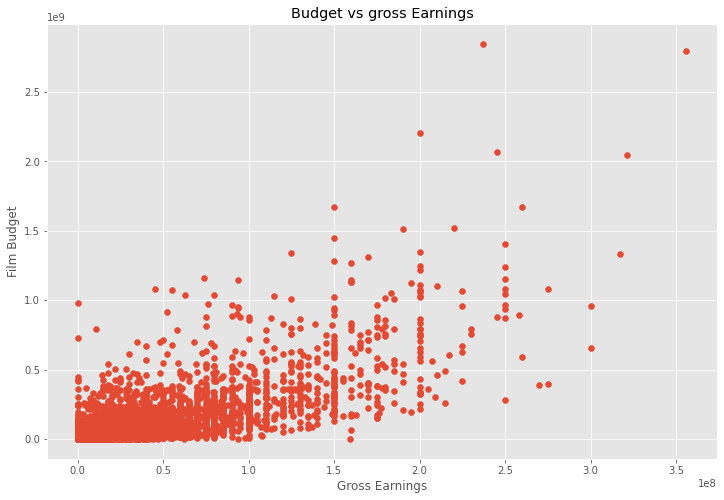

In [38]:
# Scatterplot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.show()


In [39]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

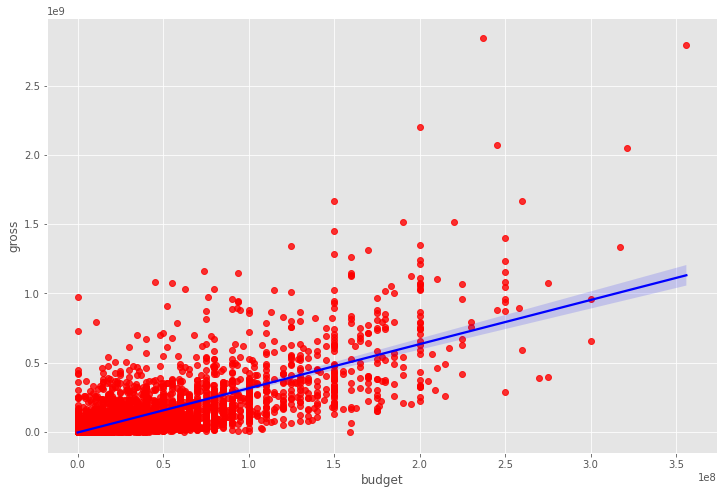

In [16]:
# Plotting Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [18]:
# Looking at correlation

df.corr(method ='pearson') #pearson

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358,0.997427
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564,0.100330
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984,0.218088
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372,0.300212
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,0.255169
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000,0.116311
yearcorrect,0.997427,0.100330,0.218088,0.300212,0.255169,0.116311,1.000000


In [19]:
# Looking at correlation

df.corr(method ='kendall') #kendall

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390,0.987853
score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601,0.072344
votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697,0.325048
budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184,0.200315
gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429,0.206471
runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000,0.096229
yearcorrect,0.987853,0.072344,0.325048,0.200315,0.206471,0.096229,1.000000


In [20]:
df.corr(method = 'spearman') #spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805,0.997423
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868,0.105963
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359,0.461382
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941,0.278633
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478,0.300333
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000,0.141771
yearcorrect,0.997423,0.105963,0.461382,0.278633,0.300333,0.141771,1.000000


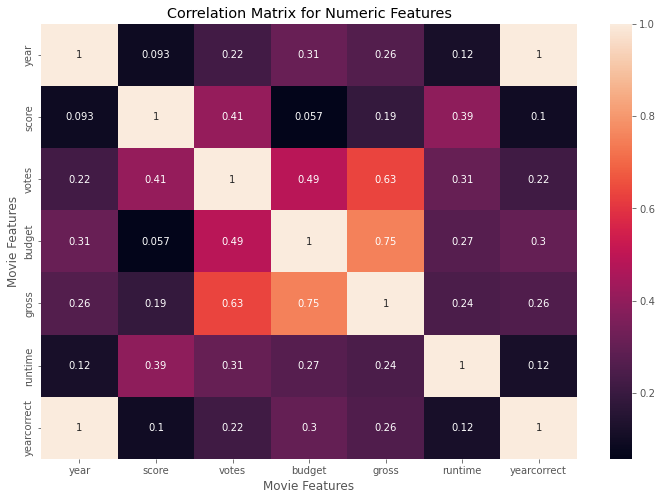

In [21]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [22]:
#Looking at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [40]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,6,0,2009,696,7.8,1100000,1155,1778,2335,56,237000000,2847246203,2254,162,2009
7445,535,6,0,2019,183,8.4,903000,162,743,2242,56,356000000,2797501328,1606,181,2019
3045,6896,6,6,1997,704,7.8,1100000,1155,1778,1595,56,200000000,2201647264,2254,194,1997
6663,5144,6,0,2015,698,7.8,876000,1125,2550,524,56,245000000,2069521700,1540,138,2015
7244,536,6,0,2018,192,8.4,897000,162,743,2242,56,321000000,2048359754,1606,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,7,5,1989,1277,4.5,274,117,82,2798,56,0,0,1159,92,1990
1614,1745,7,10,1989,55,5.2,1300,1033,1743,166,55,0,0,146,85,1989
1606,2691,7,8,1989,257,6.0,2900,2743,946,1195,6,0,0,2238,89,1989
1601,3836,3,4,1989,1160,7.1,1500,1105,1696,681,18,0,0,504,104,1990


In [55]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989
1601,My Twentieth Century,NOT RATED,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990


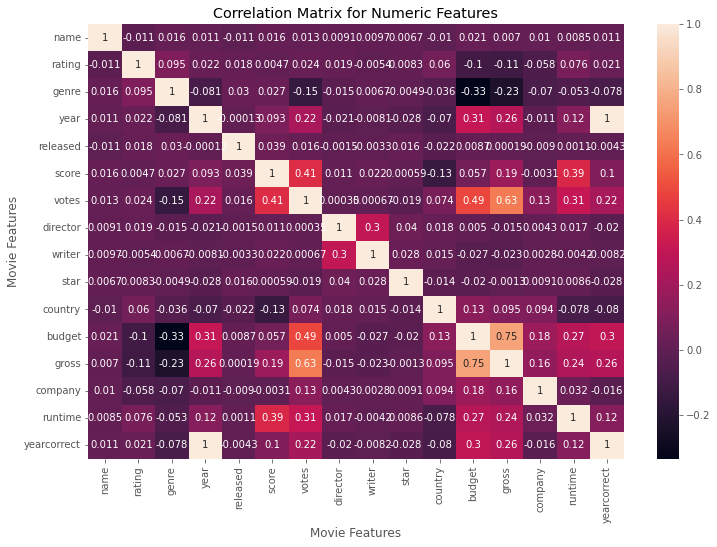

In [56]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [57]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.011237,0.016355,0.011453,-0.010703,0.016377,0.013038,0.009079,0.009733,0.006742,-0.010397,0.020548,0.006989,0.010087,0.008483,0.010881
rating,-0.011237,1.000000,0.095126,0.022121,0.017978,0.004684,0.024117,0.019494,-0.005397,0.008271,0.060419,-0.102540,-0.111325,-0.058351,0.075799,0.021003
genre,0.016355,0.095126,1.000000,-0.081261,0.030296,0.027384,-0.145296,-0.015258,0.006701,-0.004873,-0.036475,-0.334021,-0.234297,-0.070445,-0.052914,-0.078034
year,0.011453,0.022121,-0.081261,1.000000,-0.000128,0.092616,0.222427,-0.020795,-0.008141,-0.027729,-0.069946,0.309212,0.261900,-0.011193,0.116358,0.997427
released,-0.010703,0.017978,0.030296,-0.000128,1.000000,0.039362,0.015911,-0.001517,-0.003342,0.015566,-0.022202,0.008688,0.000186,-0.008973,0.001072,-0.004269
score,0.016377,0.004684,0.027384,0.092616,0.039362,1.000000,0.407101,0.010568,0.022378,0.000587,-0.134223,0.056863,0.186012,-0.003112,0.394564,0.100330
votes,0.013038,0.024117,-0.145296,0.222427,0.015911,0.407101,1.000000,0.000349,0.000672,-0.019316,0.073732,0.486931,0.632870,0.131575,0.306984,0.218088
director,0.009079,0.019494,-0.015258,-0.020795,-0.001517,0.010568,0.000349,1.000000,0.299519,0.039700,0.017736,0.004976,-0.014916,0.004295,0.017062,-0.020455
writer,0.009733,-0.005397,0.006701,-0.008141,-0.003342,0.022378,0.000672,0.299519,1.000000,0.028432,0.014760,-0.026544,-0.022986,0.002814,-0.004160,-0.008165
star,0.006742,0.008271,-0.004873,-0.027729,0.015566,0.000587,-0.019316,0.039700,0.028432,1.000000,-0.014396,-0.020153,-0.001269,0.009128,0.008556,-0.028098


In [57]:
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name         name           1.000000
             rating        -0.010640
             genre          0.016355
             year           0.011453
             released      -0.010703
                              ...   
yearcorrect  budget         0.300212
             gross          0.255169
             company       -0.016499
             runtime        0.116311
             yearcorrect    1.000000
Length: 256, dtype: float64

In [59]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145296
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [60]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross        votes          0.632870
votes        gross          0.632870
gross        budget         0.750157
budget       gross          0.750157
year         yearcorrect    0.997427
yearcorrect  year           0.997427
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [62]:
# Conclusion : Votes and budget have the highest correlation to gross earnings



In [61]:
# Gross revenue of some of the Top companies


CompanyGross = df.groupby(['company','yearcorrect'])[["gross"]].sum()

CompanyGrossSorted = CompanyGross.sort_values('gross', ascending = False)

CompanyGrossSorted = CompanyGrossSorted['gross'].astype('int64') 

CompanyGrossSorted

company                 yearcorrect
Walt Disney Pictures    2019           5773131804
Marvel Studios          2018           4018631866
Universal Pictures      2015           3834354888
Twentieth Century Fox   2009           3793491246
Walt Disney Pictures    2017           3789382071
                                          ...    
Daiei Studios           2001                    0
Callender Company       1987                    0
Santa Fe International  1983                    0
Santa Monica Holdings   1999                    0
Les Films 13            1986                    0
Name: gross, Length: 4547, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='gross'>

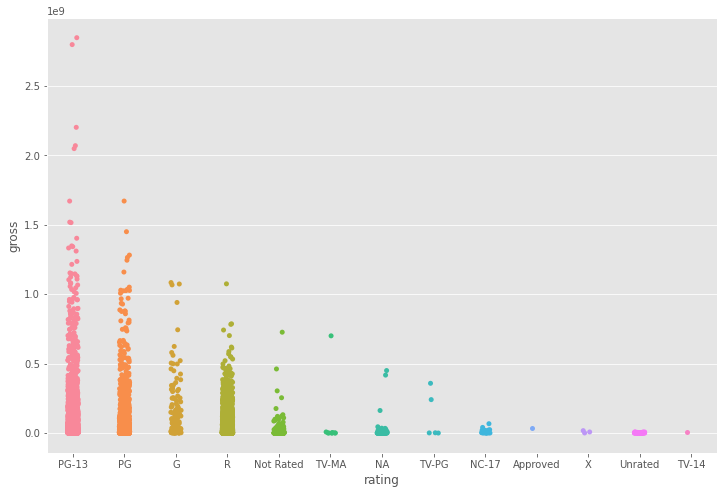

In [84]:
# PLotting a strip plot to get gross income by the ratings alloted to the movie

sns.stripplot(x="rating", y="gross", data=df)

<AxesSubplot:xlabel='genre', ylabel='gross'>

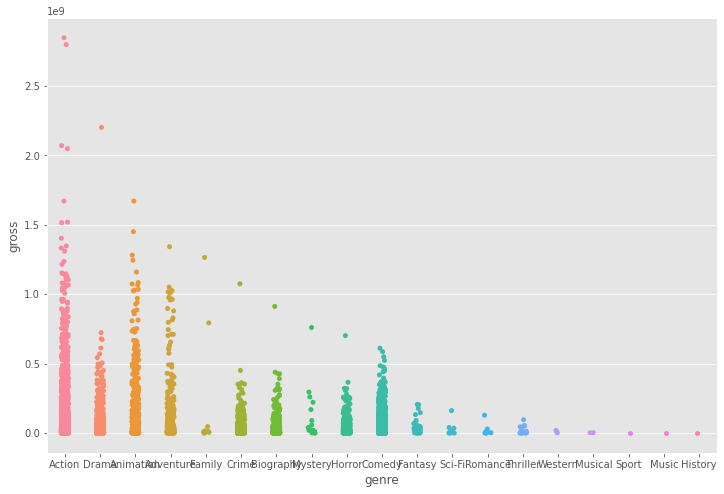

In [86]:
# PLotting a strip plot to get gross income by genre of the movie

sns.stripplot(x="genre", y="gross", data=df)